<a href="https://colab.research.google.com/github/parasgulati8/People-Analytics/blob/FeatureExtraction/People_Analytics_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import itertools
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

pd.options.display.max_columns = 100

## Import Data

In [0]:
data = pd.read_excel('drive/My Drive/Colab Notebooks/dataset/Health_Care_Data_train.xlsx')

In [4]:
data.head()

,Group,Specialty,physician,verysat,q1,q2,q3,q5,q6,q7,q9,q10,q11,q12,q13,q14,q16,q17,q18,q19,q20,q27,q34,q35,q37,q38,q45,q46,q47,q48,q50,q51,q53,q54,q55,q56,q57,q58
0,A,Other,1,0.0,5.0,2.0,2.0,4.0,1.0,5.0,5.0,4.0,5.0,5.0,3.0,4.0,3.0,2.0,2.0,2.0,2.0,5.0,1.0,3.0,4.0,4.0,1.0,5.0,2.0,2.0,3.0,3.0,5.0,5.0,5.0,3.0,3.0,3.0
1,A,Other,1,0.0,5.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,1.0,4.0,2.0,2.0,5.0,1.0,3.0,4.0,4.0,4.0,4.0,3.0,2.0,4.0,4.0,4.0,3.0,3.0,5.0,4.0,1.0,3.0,3.0,2.0
2,A,Other,1,0.0,5.0,5.0,4.0,4.0,4.0,3.0,5.0,4.0,4.0,5.0,3.0,5.0,4.0,4.0,5.0,3.0,3.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,3.0,3.0,5.0,3.0,2.0
3,A,Other,1,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,5.0,5.0,5.0,1.0
4,A,Primary_Care,1,0.0,3.0,1.0,1.0,2.0,1.0,3.0,4.0,1.0,4.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,4.0,3.0,1.0,4.0,1.0,5.0,3.0,3.0,5.0,5.0,1.0,3.0,1.0,3.0


In [5]:
data.describe()

,physician,verysat,q1,q2,q3,q5,q6,q7,q9,q10,q11,q12,q13,q14,q16,q17,q18,q19,q20,q27,q34,q35,q37,q38,q45,q46,q47,q48,q50,q51,q53,q54,q55,q56,q57,q58
count,1100.000000,1093.000000,1094.000000,1089.000000,1094.000000,1097.000000,1083.000000,1089.000000,1093.000000,1090.000000,1074.000000,1082.000000,1082.000000,1089.000000,1092.000000,1092.000000,1092.000000,1092.000000,1069.000000,1087.000000,1096.000000,1093.000000,1091.000000,1091.000000,1088.000000,1087.000000,1085.000000,1088.000000,1088.000000,1089.000000,1092.000000,1091.000000,1086.000000,1090.000000,1086.000000,1091.000000
mean,0.911818,0.288198,4.469835,3.425161,3.705667,3.710119,3.287165,4.173554,4.535224,3.675229,3.865922,4.222736,4.337338,3.703398,3.427656,3.601648,3.289377,3.065018,3.037418,4.382705,3.354015,3.886551,4.169569,3.766269,2.003676,3.956762,3.787097,4.144301,3.860294,3.943985,2.808608,2.766269,3.000921,3.676147,3.731123,1.876260
std,0.283688,0.453131,0.776192,1.297676,1.178189,1.202119,1.256293,0.979664,0.655977,1.038749,0.837547,0.844704,0.897046,1.293791,1.376537,1.277212,1.324713,1.324653,1.287546,0.796398,1.291575,1.017220,0.888060,1.045479,0.907895,0.899646,0.951702,0.847283,1.076967,0.924336,1.233878,1.198393,1.237285,0.998014,1.116895,1.030852
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,0.000000,4.000000,2.000000,3.000000,3.000000,2.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,4.000000,2.000000,4.000000,4.000000,3.000000,1.000000,4.000000,3.000000,4.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,1.000000
50%,1.000000,0.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,5.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,2.000000
75%,1.000000,1.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,5.000000,5.000000,2.000000,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000,2.000000
max,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Data Preprocessing

Three Approaches :
- Drop the rows with Null values
- Replace them with mean
- Replace them with Median

### Feature Engineering

In [0]:
from sklearn.impute import SimpleImputer 

In [0]:
data_sorted = data.sort_values(by='q58')
data_sorted = data_sorted.reset_index()

df = []
for i in range(1,6):
  imputer = SimpleImputer(strategy='most_frequent')
  a = imputer.fit_transform(data_sorted[data_sorted.q58 ==i].iloc[:, :-1], data_sorted[data_sorted.q58 == i].iloc[:, -1])
  df1 = pd.DataFrame(a, columns=data_sorted.columns[:-1])
  df1['q58'] = data_sorted[data_sorted.q58 ==i].iloc[:, -1].values
  df.append(df1)

In [0]:
data = pd.concat((df[0], df[1], df[2], df[3], df[4]))

In [0]:
data = data.set_index('index').sort_values(by='index')

In [0]:
data.isna().sum()

In [0]:
data.dropna(inplace=True)

In [190]:
data.columns

Index(['Group', 'Specialty', 'physician', 'verysat', 'q1', 'q2', 'q3', 'q5',
       'q6', 'q7', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q16', 'q17',
       'q18', 'q19', 'q20', 'q27', 'q34', 'q35', 'q37', 'q38', 'q45', 'q46',
       'q47', 'q48', 'q50', 'q51', 'q53', 'q54', 'q55', 'q56', 'q57', 'q58'],
      dtype='object')

In [0]:
temp = data.iloc[:, 4:-1]

In [0]:
new_cols = pd.DataFrame(temp.iloc[0].value_counts().sort_index()).T
for i in range(1,len(temp)):
  new_cols = pd.concat((new_cols, pd.DataFrame(temp.iloc[i].value_counts().sort_index()).T))

In [0]:
new_data = pd.concat((new_cols.fillna(0), data), axis=1)

In [244]:
new_data

,1.0,2.0,3.0,4.0,5.0,Group,Specialty,physician,verysat,q1,q2,q3,q5,q6,q7,q9,q10,q11,q12,q13,q14,q16,q17,q18,q19,q20,q27,q34,q35,q37,q38,q45,q46,q47,q48,q50,q51,q53,q54,q55,q56,q57,q58
0,3.0,8.0,7.0,5.0,10.0,A,Other,1,0,5,2,2,4,1,5,5,4,5,5,3,4,3,2,2,2,2,5,1,3,4,4,1,5,2,2,3,3,5,5,5,3,3,3.0
1,3.0,3.0,6.0,16.0,5.0,A,Other,1,0,5,4,4,4,4,4,5,4,4,5,1,4,2,2,5,1,3,4,4,4,4,3,2,4,4,4,3,3,5,4,1,3,3,2.0
2,0.0,4.0,10.0,11.0,8.0,A,Other,1,0,5,5,4,4,4,3,5,4,4,5,3,5,4,4,5,3,3,5,4,4,3,3,2,2,4,4,2,3,2,3,3,5,3,2.0
3,3.0,0.0,0.0,0.0,30.0,A,Other,1,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,1,5,5,5,5,5,1,1,5,5,5,1.0
4,16.0,1.0,9.0,4.0,3.0,A,Primary_Care,1,0,3,1,1,2,1,3,4,1,4,3,3,1,1,1,1,1,1,3,1,1,4,3,1,4,1,5,3,3,5,5,1,3,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,2.0,1.0,0.0,6.0,24.0,H,Specialist,1,1,4,5,5,5,5,5,5,4,4,4,5,5,5,5,5,4,4,5,5,5,5,5,1,5,5,5,5,5,2,1,5,5,5,2.0
1096,0.0,3.0,18.0,11.0,1.0,H,Surgical,1,0,5,4,2,4,4,4,4,3,3,4,3,3,3,4,3,3,3,3,2,3,3,3,3,3,3,4,4,4,3,2,3,3,4,2.0
1097,3.0,0.0,0.0,0.0,30.0,H,Surgical,1,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,1,5,5,5,5,5,1,1,5,5,5,1.0
1098,0.0,2.0,5.0,16.0,10.0,H,Surgical,1,0,5,4,4,5,4,5,5,4,4,5,5,4,4,4,4,4,4,5,4,4,5,4,2,4,5,5,3,3,2,3,3,3,4,2.0


In [0]:
new_data.reset_index(drop=True, inplace=True)

In [0]:
new_data['negatives'] = new_data.loc[:, 1.0] + new_data.loc[:, 2.0]

In [0]:
new_data['positives'] = new_data.loc[:, 4.0] + new_data.loc[:, 5.0]

In [248]:
new_data

,1.0,2.0,3.0,4.0,5.0,Group,Specialty,physician,verysat,q1,q2,q3,q5,q6,q7,q9,q10,q11,q12,q13,q14,q16,q17,q18,q19,q20,q27,q34,q35,q37,q38,q45,q46,q47,q48,q50,q51,q53,q54,q55,q56,q57,q58,negatives,positives
0,3.0,8.0,7.0,5.0,10.0,A,Other,1,0,5,2,2,4,1,5,5,4,5,5,3,4,3,2,2,2,2,5,1,3,4,4,1,5,2,2,3,3,5,5,5,3,3,3.0,11.0,15.0
1,3.0,3.0,6.0,16.0,5.0,A,Other,1,0,5,4,4,4,4,4,5,4,4,5,1,4,2,2,5,1,3,4,4,4,4,3,2,4,4,4,3,3,5,4,1,3,3,2.0,6.0,21.0
2,0.0,4.0,10.0,11.0,8.0,A,Other,1,0,5,5,4,4,4,3,5,4,4,5,3,5,4,4,5,3,3,5,4,4,3,3,2,2,4,4,2,3,2,3,3,5,3,2.0,4.0,19.0
3,3.0,0.0,0.0,0.0,30.0,A,Other,1,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,1,5,5,5,5,5,1,1,5,5,5,1.0,3.0,30.0
4,16.0,1.0,9.0,4.0,3.0,A,Primary_Care,1,0,3,1,1,2,1,3,4,1,4,3,3,1,1,1,1,1,1,3,1,1,4,3,1,4,1,5,3,3,5,5,1,3,1,3.0,17.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,2.0,1.0,0.0,6.0,24.0,H,Specialist,1,1,4,5,5,5,5,5,5,4,4,4,5,5,5,5,5,4,4,5,5,5,5,5,1,5,5,5,5,5,2,1,5,5,5,2.0,3.0,30.0
1087,0.0,3.0,18.0,11.0,1.0,H,Surgical,1,0,5,4,2,4,4,4,4,3,3,4,3,3,3,4,3,3,3,3,2,3,3,3,3,3,3,4,4,4,3,2,3,3,4,2.0,3.0,12.0
1088,3.0,0.0,0.0,0.0,30.0,H,Surgical,1,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,1,5,5,5,5,5,1,1,5,5,5,1.0,3.0,30.0
1089,0.0,2.0,5.0,16.0,10.0,H,Surgical,1,0,5,4,4,5,4,5,5,4,4,5,5,4,4,4,4,4,4,5,4,4,5,4,2,4,5,5,3,3,2,3,3,3,4,2.0,2.0,26.0


In [249]:
new_data.columns

Index([        1.0,         2.0,         3.0,         4.0,         5.0,
           'Group', 'Specialty', 'physician',   'verysat',        'q1',
              'q2',        'q3',        'q5',        'q6',        'q7',
              'q9',       'q10',       'q11',       'q12',       'q13',
             'q14',       'q16',       'q17',       'q18',       'q19',
             'q20',       'q27',       'q34',       'q35',       'q37',
             'q38',       'q45',       'q46',       'q47',       'q48',
             'q50',       'q51',       'q53',       'q54',       'q55',
             'q56',       'q57',       'q58', 'negatives', 'positives'],
      dtype='object')

In [0]:
cols = ['Group', 'Specialty', 'physician',   'verysat',        'q1',
              'q2',        'q3',        'q5',        'q6',        'q7',
              'q9',       'q10',       'q11',       'q12',       'q13',
             'q14',       'q16',       'q17',       'q18',       'q19',
             'q20',       'q27',       'q34',       'q35',       'q37',
             'q38',       'q45',       'q46',       'q47',       'q48',
             'q50',       'q51',       'q53',       'q54',       'q55',
             'q56',       'q57', 'negatives', 3.0, 'positives', 'q58']

In [0]:
new_data = new_data.reindex(columns=cols)

In [0]:
dummy = pd.get_dummies(data['Specialty'])
dummy1 = pd.get_dummies(data['Group'])

In [0]:
df = pd.concat([dummy, dummy1, new_data], axis = 1)

In [0]:
df = df.drop(columns=['Group', 'Specialty'], axis=1)

In [258]:
df

,Non_MD,Other,Primary_Care,Specialist,Surgical,A,B,C,D,E,F,G,H,physician,verysat,q1,q2,q3,q5,q6,q7,q9,q10,q11,q12,q13,q14,q16,q17,q18,q19,q20,q27,q34,q35,q37,q38,q45,q46,q47,q48,q50,q51,q53,q54,q55,q56,q57,negatives,3.0,positives,q58
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,5,2,2,4,1,5,5,4,5,5,3,4,3,2,2,2,2,5,1,3,4,4,1,5,2,2,3,3,5,5,5,3,3,11.0,7.0,15.0,3.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,5,4,4,4,4,4,5,4,4,5,1,4,2,2,5,1,3,4,4,4,4,3,2,4,4,4,3,3,5,4,1,3,3,6.0,6.0,21.0,2.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,5,5,4,4,4,3,5,4,4,5,3,5,4,4,5,3,3,5,4,4,3,3,2,2,4,4,2,3,2,3,3,5,3,4.0,10.0,19.0,2.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,1,5,5,5,5,5,1,1,5,5,5,3.0,0.0,30.0,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,3,1,1,2,1,3,4,1,4,3,3,1,1,1,1,1,1,3,1,1,4,3,1,4,1,5,3,3,5,5,1,3,1,17.0,9.0,7.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1096,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1097,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1098,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Confusion Matrix

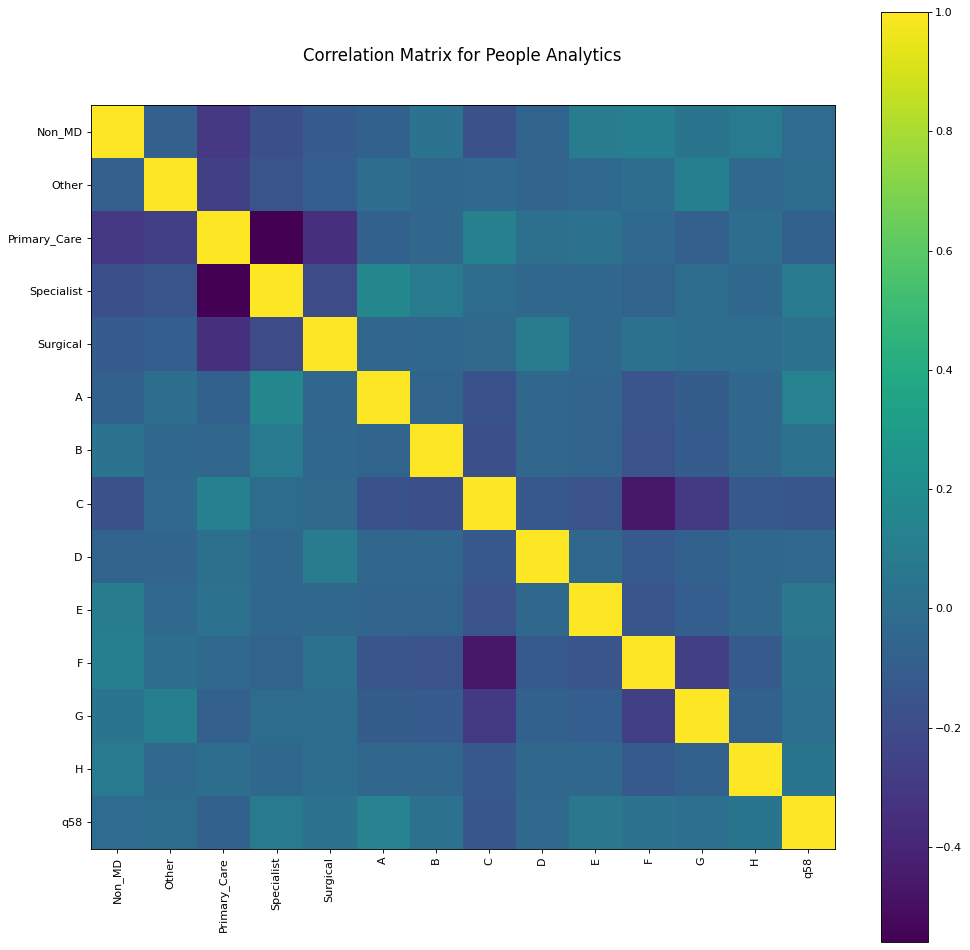

In [117]:
def plotCorrelationMatrix(df, graphWidth):
    filename = 'People Analytics'
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    # print(df.columns)
    corr = df.corr()
    # print(corr)
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

plotCorrelationMatrix(df, 15)

In [69]:
df.shape

(1091, 49)

### Using K fold Cross Validation

In [0]:
def get_folds(X,y, k=5):
    return list(StratifiedKFold(n_splits=k, shuffle=True, random_state=1).split(X, y))

In [0]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [0]:
folds = get_folds(X, y)

In [0]:
X_train, X_test, y_train, y_test = [], [], [], []

for fold in folds:
  X_train.append(X.values[fold[0]])
  X_test.append(X.values[fold[1]])
  y_train.append(y.values[fold[0]])
  y_test.append(y.values[fold[1]])
                 

### Scaling the data

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
fold = folds[0]
X_train, X_test, y_train, y_test = X.values[fold[0]], X.values[fold[1]], y.values[fold[0]], y.values[fold[1]]

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [214]:
X_train.shape

(872, 48)

In [0]:
plt.figure(figsize=(25,10))
plt.hist(X_train)

### Samples per Class 

(array([412.,   0., 244.,   0.,   0., 154.,   0.,  38.,   0.,  24.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

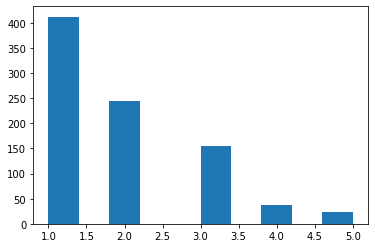

In [20]:
plt.hist(y_train)

(array([103.,   0.,  61.,   0.,   0.,  39.,   0.,   9.,   0.,   7.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

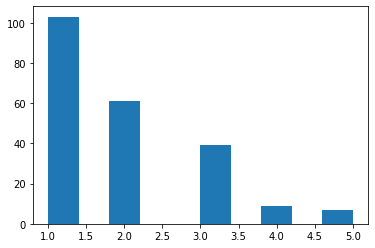

In [21]:
plt.hist(y_test)

### PCA

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=10)
X_train= pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [0]:
explained_variance = pca.explained_variance_ratio_

In [0]:
pd.Series(explained_variance)

### Kernel PCA

In [0]:
from sklearn.decomposition import KernelPCA

In [0]:
kpca = KernelPCA(n_components=2, kernel='rbf')
X_train= kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

In [315]:
X_train.shape

(872, 2)

### LDA

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [0]:
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [261]:
X_train.shape

(872, 4)

In [0]:
i = 0
dic = {}
for j in range(2,15):
  dic[j] = avg[i]
  i = i+1

dic[4]

0.5806761544466462

### How many unique elements in Specialty and Group Column

In [0]:
np.unique(df['H'])

array([ 0.,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [0]:
np.unique(data1['Group'])

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], dtype=object)

In [0]:
np.unique(data1['q58'])

array([1., 2., 3., 4., 5.])

# KNN

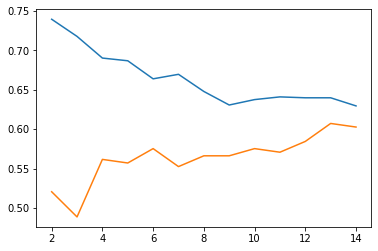

In [329]:
acc = []
acc_test = []
for i in range(2,15):
        knn = KNeighborsClassifier(i)
        knn.fit(X_train, y_train)
        acc.append(accuracy_score(y_train, knn.predict(X_train)))
        acc_test.append(accuracy_score(y_test, knn.predict(X_test)))
        
plt.figure()
plt.plot(range(2,15), acc)
plt.plot(range(2,15), acc_test)
plt.show()

In [330]:
max(acc_test)

0.6073059360730594

Fold =  0


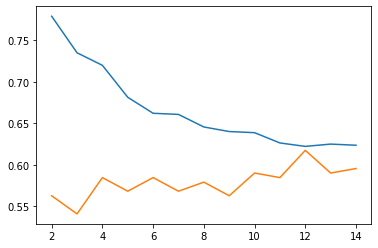

Fold =  1


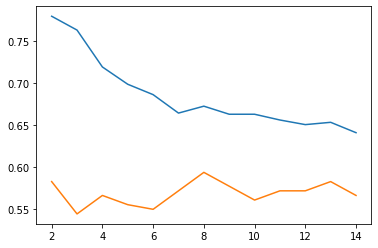

Fold =  2


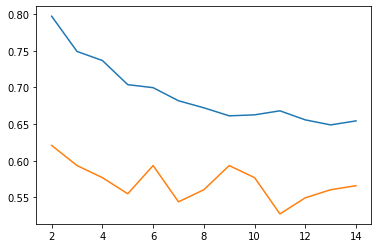

Fold =  3


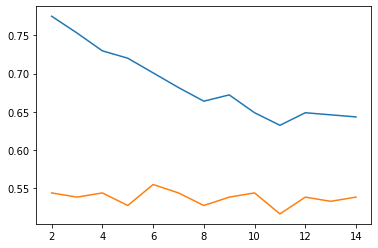

Fold =  4


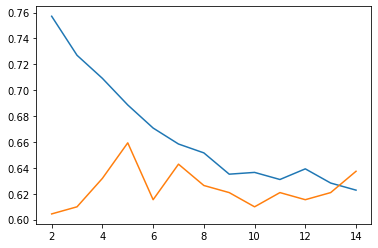

In [0]:
accuracies = []
accuracies_test = []
for j in range(5):
    print('Fold = ',j)  
    acc = []
    acc_test = []
    for i in range(2,15):
        knn = KNeighborsClassifier(i)
        knn.fit(X_train[j], y_train[j])
        acc.append(accuracy_score(y_train[j], knn.predict(X_train[j])))
        acc_test.append(accuracy_score(y_test[j], knn.predict(X_test[j])))
        
    plt.figure()
    plt.plot(range(2,15), acc)
    plt.plot(range(2,15), acc_test)
    plt.show()

    accuracies.append(acc)
    accuracies_test.append(acc_test)

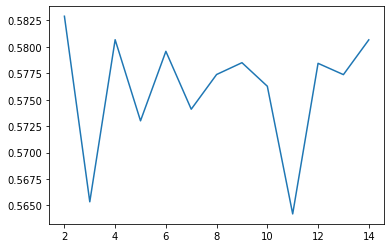

In [0]:
avg = []
for i in range(len(accuracies_test[0])):
  avg.append(sum([j[i] for j in accuracies_test])/5)

plt.plot(range(2,15), avg)

# Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

In [76]:
X_train.shape

(872, 4)

In [331]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = lr.predict(X_test)

In [333]:
# from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[82, 17,  4,  0,  0],
       [26, 25, 10,  0,  0],
       [ 8, 10, 21,  0,  0],
       [ 1,  3,  5,  0,  0],
       [ 2,  0,  5,  0,  0]])

In [62]:
cm #Kernel PCA

array([[82, 17,  4,  0,  0],
       [26, 25, 10,  0,  0],
       [ 8, 10, 21,  0,  0],
       [ 1,  3,  5,  0,  0],
       [ 2,  0,  5,  0,  0]])

In [68]:
cm #LDA

array([[87, 11,  5,  0,  0],
       [25, 29,  7,  0,  0],
       [ 4, 12, 23,  0,  0],
       [ 0,  2,  7,  0,  0],
       [ 2,  0,  5,  0,  0]])

In [80]:
cm #LDA , n_components = None , X_train shape = (-1,4)

array([[87, 10,  5,  0,  1],
       [25, 28,  7,  0,  1],
       [ 3, 14, 19,  1,  2],
       [ 0,  3,  6,  0,  0],
       [ 2,  1,  3,  0,  1]])

# Random Forest 

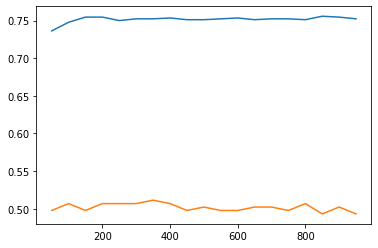

In [134]:
acc = []
acc_test = []
for i in range(50,1000,50):
    rfc = RandomForestClassifier(i, max_leaf_nodes=32)
    rfc.fit(X_train, y_train)
    acc.append(accuracy_score(y_train, rfc.predict(X_train)))
    acc_test.append(accuracy_score(y_test, rfc.predict(X_test)))

plt.figure()
plt.plot(range(50,1000,50), acc)
plt.plot(range(50,1000,50), acc_test)
plt.show()


In [0]:
rfc = RandomForestClassifier(200, max_leaf_nodes=32)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [136]:
confusion_matrix(y_test, y_pred)

array([[84, 14,  5,  0,  0],
       [31, 18, 12,  0,  0],
       [13, 19,  7,  0,  0],
       [ 0,  3,  6,  0,  0],
       [ 3,  1,  3,  0,  0]])

In [86]:
X_train.shape

(872, 48)

In [82]:
max(acc_test)

0.6301369863013698

Fold =  0


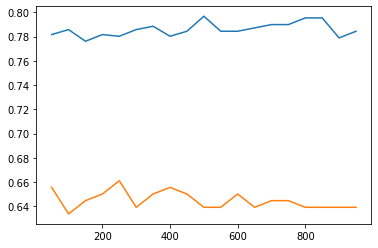

Fold =  1


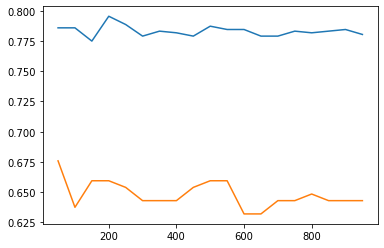

Fold =  2


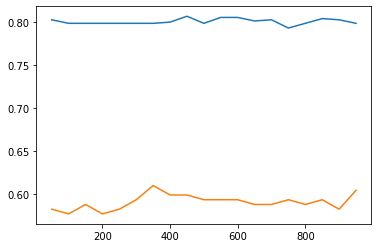

Fold =  3


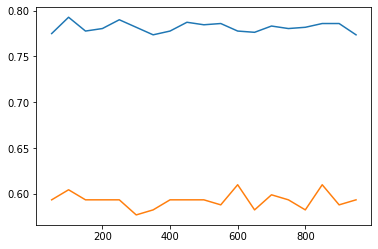

Fold =  4


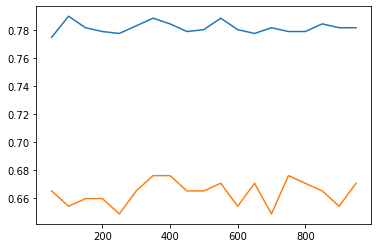

In [0]:
accuracies = []
accuracies_test = []

for j in range(5):
    # X_train, X_test, y_train, y_test = X.iloc[fold[0], :], X.iloc[fold[1], :], y.iloc[fold[0]], y.iloc[fold[1]]
    print ('Fold = ', j)
    acc = []
    acc_test = []
    for i in range(50,1000,50):
        rfc = RandomForestClassifier(i, max_leaf_nodes=32)
        rfc.fit(X_train[j], y_train[j])
        acc.append(accuracy_score(y_train[j], rfc.predict(X_train[j])))
        acc_test.append(accuracy_score(y_test[j], rfc.predict(X_test[j])))
    
    plt.figure()
    plt.plot(range(50,1000,50), acc)
    plt.plot(range(50,1000,50), acc_test)
    plt.show()

    accuracies.append(acc)
    accuracies_test.append(acc_test)

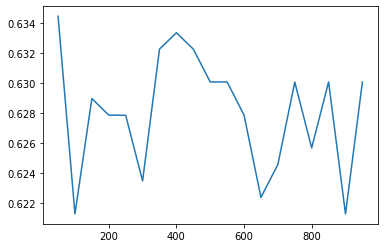

In [0]:
# Finding average accuracy for each random classifier across 5 folds

avg = []
for i in range(len(accuracies_test[0])):
  avg.append(sum([j[i] for j in accuracies_test])/5)

plt.plot(range(50,1000,50), avg)

In [0]:
i = 0
dic = {}
for j in range(50,1000,50):
  dic[j] = avg[i]
  i = i+1

dic[400] # 0.6333573530294843 for 500

0.6333453431814087

# Deep Learning

In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, ReLU, PReLU
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.initializers import glorot_uniform

In [0]:
for i in range(5):
  y_train[i] = pd.get_dummies(y_train[i]).values
  y_test[i] = pd.get_dummies(y_test[i]).values

In [0]:
y_train = pd.get_dummies(y_train).values
y_test = pd.get_dummies(y_test).values

In [95]:
model = Sequential()
model.add(Dense(8, activation='sigmoid', input_dim=4, kernel_initializer=glorot_uniform(seed=42)))
model.add(Dense(16, activation='sigmoid', kernel_initializer=glorot_uniform(seed=42)))
model.add(Dense(5, activation='softmax', kernel_initializer=glorot_uniform(seed=42)))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_16 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 85        
Total params: 269
Trainable params: 269
Non-trainable params: 0
_________________________________________________________________


In [97]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# mc = ModelCheckpoint('drive/My Drive/Colab Notebooks/dataset/model'+str(i)+'.h5', monitor='val_accuracy', save_best_only=True)
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test)) #, callbacks=[mc])

Epoch 1/500
28/28 [==============================] - 0s 6ms/step - loss: 0.7630 - accuracy: 0.6881 - val_loss: 0.9620 - val_accuracy: 0.5936
Epoch 2/500
28/28 [==============================] - 0s 3ms/step - loss: 0.7748 - accuracy: 0.6869 - val_loss: 0.9616 - val_accuracy: 0.6119
Epoch 3/500
28/28 [==============================] - 0s 3ms/step - loss: 0.7579 - accuracy: 0.6869 - val_loss: 0.9620 - val_accuracy: 0.6027
Epoch 4/500
28/28 [==============================] - 0s 3ms/step - loss: 0.7749 - accuracy: 0.6892 - val_loss: 0.9629 - val_accuracy: 0.5936
Epoch 5/500
28/28 [==============================] - 0s 3ms/step - loss: 0.7576 - accuracy: 0.6869 - val_loss: 0.9631 - val_accuracy: 0.6027
Epoch 6/500
28/28 [==============================] - 0s 3ms/step - loss: 0.7599 - accuracy: 0.6892 - val_loss: 0.9623 - val_accuracy: 0.6119
Epoch 7/500
28/28 [==============================] - 0s 3ms/step - loss: 0.7646 - accuracy: 0.6892 - val_loss: 0.9623 - val_accuracy: 0.6164
Epoch 8/500
2

In [0]:
for i in range(5):
  model = Sequential()
  model.add(Dense(4, activation='sigmoid', input_dim=51, kernel_initializer=glorot_uniform(seed=42)))
  model.add(Dense(10, activation='sigmoid', kernel_initializer=glorot_uniform(seed=42)))
  model.add(Dense(5, activation='softmax', kernel_initializer=glorot_uniform(seed=42)))

  # X_train, X_test, y_train, y_test = X.iloc[fold[0], :], X.iloc[fold[1], :], y.iloc[fold[0]], y.iloc[fold[1]]
  # y_train = pd.get_dummies(y_train).values
  # y_test = pd.get_dummies(y_test).values

  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  # mc = ModelCheckpoint('drive/My Drive/Colab Notebooks/dataset/model'+str(i)+'.h5', monitor='val_accuracy', save_best_only=True)
  model.fit(X_train[i], y_train[i], epochs=200, validation_data=(X_test[i], y_test[i])) #, callbacks=[mc])

Epoch 1/200
23/23 [==============================] - 0s 7ms/step - loss: 1.3455 - accuracy: 0.4753 - val_loss: 1.3231 - val_accuracy: 0.4754
Epoch 2/200
23/23 [==============================] - 0s 3ms/step - loss: 1.2915 - accuracy: 0.4780 - val_loss: 1.2864 - val_accuracy: 0.4754
Epoch 3/200
23/23 [==============================] - 0s 3ms/step - loss: 1.2627 - accuracy: 0.4780 - val_loss: 1.2626 - val_accuracy: 0.4754
Epoch 4/200
23/23 [==============================] - 0s 3ms/step - loss: 1.2412 - accuracy: 0.4780 - val_loss: 1.2447 - val_accuracy: 0.4754
Epoch 5/200
23/23 [==============================] - 0s 3ms/step - loss: 1.2230 - accuracy: 0.4780 - val_loss: 1.2289 - val_accuracy: 0.4754
Epoch 6/200
23/23 [==============================] - 0s 3ms/step - loss: 1.2103 - accuracy: 0.4780 - val_loss: 1.2157 - val_accuracy: 0.4754
Epoch 7/200
23/23 [==============================] - 0s 3ms/step - loss: 1.2029 - accuracy: 0.4780 - val_loss: 1.2032 - val_accuracy: 0.4754
Epoch 8/200
2

# Multivariate Gaussian 

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [318]:
pd.DataFrame(X_train)

,0,1
0,-0.332506,0.111940
1,0.549690,0.470174
2,-0.395742,0.443148
3,-0.238543,-0.100413
4,-0.327754,-0.033844
...,...,...
867,0.391332,-0.041271
868,0.426855,0.161239
869,0.541230,0.339897
870,-0.248823,-0.243201


In [0]:
X1_mean = X_train.iloc[np.where(y_train==1)].describe().iloc[1, :]
X1_std = X_train.iloc[np.where(y_train==1)].describe().iloc[2, :]

X2_mean = X_train.iloc[np.where(y_train==2)].describe().iloc[1, :]
X2_std = X_train.iloc[np.where(y_train==2)].describe().iloc[2, :]

X3_mean = X_train.iloc[np.where(y_train==3)].describe().iloc[1, :]
X3_std = X_train.iloc[np.where(y_train==3)].describe().iloc[2, :]

X4_mean = X_train.iloc[np.where(y_train==4)].describe().iloc[1, :]
X4_std = X_train.iloc[np.where(y_train==4)].describe().iloc[2, :]

X5_mean = X_train.iloc[np.where(y_train==5)].describe().iloc[1, :]
X5_std = X_train.iloc[np.where(y_train==5)].describe().iloc[2, :]

In [0]:
from scipy.stats import norm

In [0]:
p1 = 1
for i in range(len(X1_mean)):
  p1 = p1 * norm.pdf( X_train.iloc[np.where(y_train==1)].iloc[:,i].values, X1_mean[i], X1_std[i])

p2 = 1
for i in range(len(X2_mean)):
  p2 = p2 * norm.pdf( X_train.iloc[np.where(y_train==2)].iloc[:,i].values, X2_mean[i], X2_std[i])

p3 = 1
for i in range(len(X3_mean)):
  p3 = p3 * norm.pdf( X_train.iloc[np.where(y_train==3)].iloc[:,i].values, X3_mean[i], X3_std[i])

p4 = 1
for i in range(len(X4_mean)):
  p4 = p4 * norm.pdf( X_train.iloc[np.where(y_train==4)].iloc[:,i].values, X4_mean[i], X4_std[i])

p5 = 1
for i in range(len(X5_mean)):
  p5 = p5 * norm.pdf( X_train.iloc[np.where(y_train==5)].iloc[:,i].values, X5_mean[i], X5_std[i])

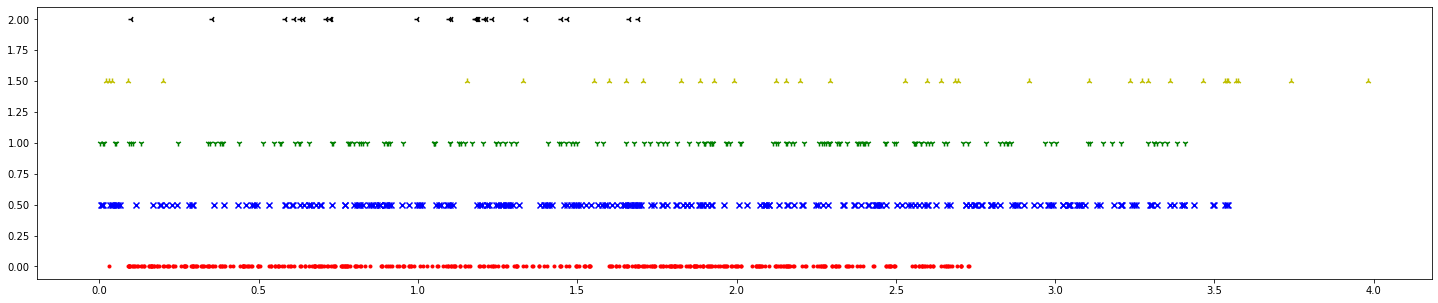

In [322]:
# PCA
plt.figure(figsize=(25,5 ))
plt.scatter(p1, [0]*len(p1), c='r', marker='.')
plt.scatter(p2, [0.5]*len(p2), c='b', marker='x')
plt.scatter(p3, [1]*len(p3), c='g', marker='1')
plt.scatter(p4, [1.5]*len(p4), c='y', marker='2')
plt.scatter(p5, [2]*len(p5), c='k', marker='3')


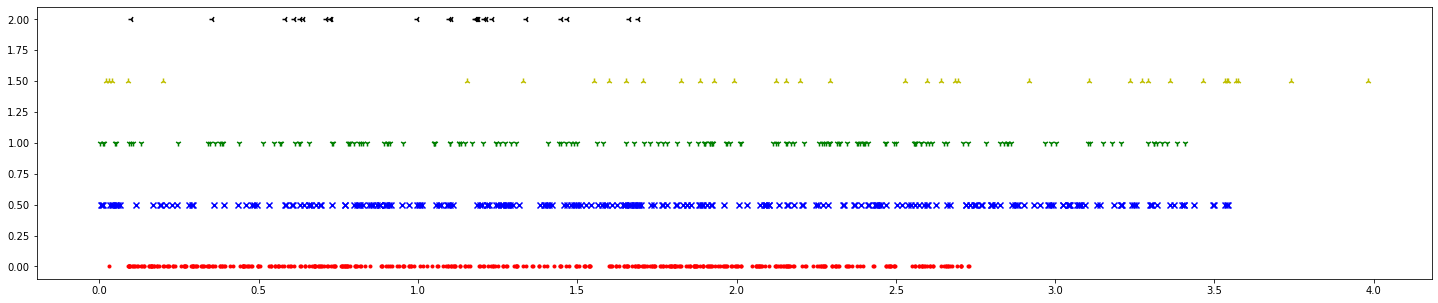

In [323]:
# KernelPCA n = 2
plt.figure(figsize=(25,5 ))
plt.scatter(p1, [0]*len(p1), c='r', marker='.')
plt.scatter(p2, [0.5]*len(p2), c='b', marker='x')
plt.scatter(p3, [1]*len(p3), c='g', marker='1')
plt.scatter(p4, [1.5]*len(p4), c='y', marker='2')
plt.scatter(p5, [2]*len(p5), c='k', marker='3')


(array([48., 46., 49., 30., 33., 30., 61., 46., 30., 39.]),
 array([0.02919885, 0.29933494, 0.56947103, 0.83960712, 1.10974321,
        1.3798793 , 1.65001539, 1.92015149, 2.19028758, 2.46042367,
        2.73055976]),
 <a list of 10 Patch objects>)

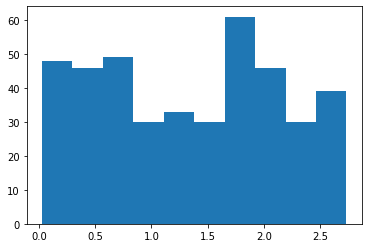

In [324]:
plt.hist(p1)

(array([20., 20., 27., 27., 32., 23., 24., 25., 25., 21.]),
 array([0.00413596, 0.35794887, 0.71176178, 1.06557469, 1.4193876 ,
        1.77320052, 2.12701343, 2.48082634, 2.83463925, 3.18845216,
        3.54226508]),
 <a list of 10 Patch objects>)

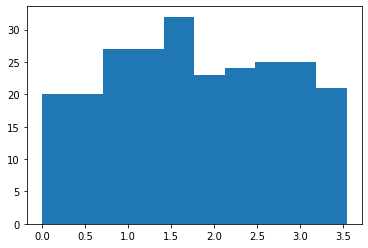

In [325]:
plt.hist(p2)

(array([11., 14., 15., 17., 11., 21., 21., 22.,  9., 13.]),
 array([1.99985313e-03, 3.42670761e-01, 6.83341668e-01, 1.02401258e+00,
        1.36468348e+00, 1.70535439e+00, 2.04602530e+00, 2.38669621e+00,
        2.72736711e+00, 3.06803802e+00, 3.40870893e+00]),
 <a list of 10 Patch objects>)

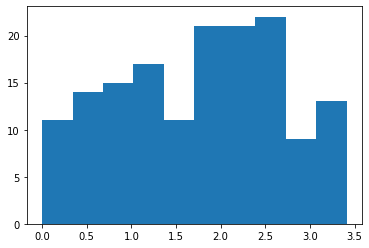

In [326]:
plt.hist(p3)

(array([ 5.,  0.,  1.,  3.,  6.,  4.,  5.,  2., 10.,  2.]),
 array([0.02025391, 0.41646662, 0.81267934, 1.20889206, 1.60510478,
        2.00131749, 2.39753021, 2.79374293, 3.18995564, 3.58616836,
        3.98238108]),
 <a list of 10 Patch objects>)

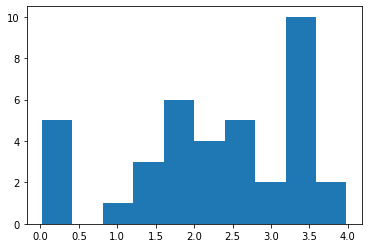

In [327]:
plt.hist(p4)

(array([1., 1., 0., 7., 0., 1., 7., 3., 2., 2.]),
 array([0.09876073, 0.25785017, 0.41693962, 0.57602906, 0.7351185 ,
        0.89420794, 1.05329738, 1.21238683, 1.37147627, 1.53056571,
        1.68965515]),
 <a list of 10 Patch objects>)

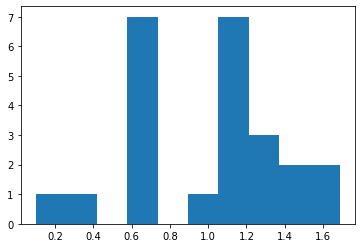

In [328]:
plt.hist(p5)

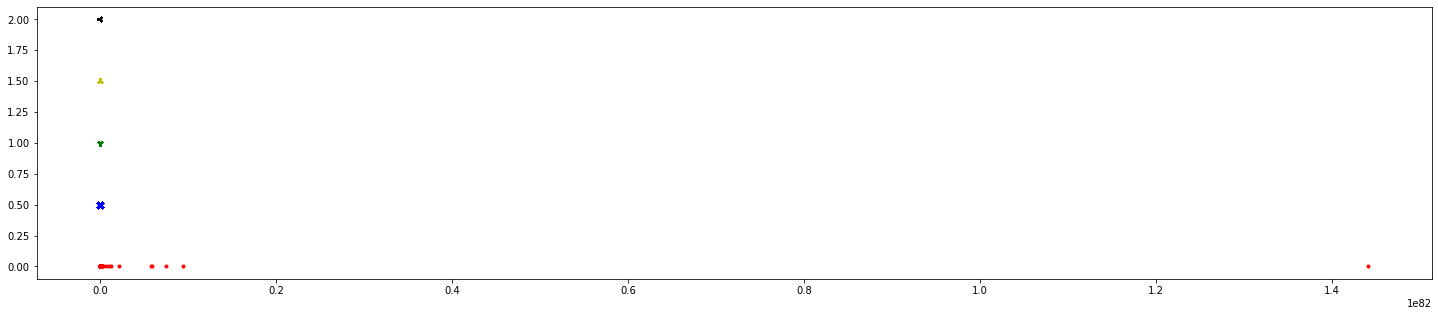

In [301]:
# KernelPCA
plt.figure(figsize=(25,5 ))
plt.scatter(p1, [0]*len(p1), c='r', marker='.')
plt.scatter(p2, [0.5]*len(p2), c='b', marker='x')
plt.scatter(p3, [1]*len(p3), c='g', marker='1')
plt.scatter(p4, [1.5]*len(p4), c='y', marker='2')
plt.scatter(p5, [2]*len(p5), c='k', marker='3')


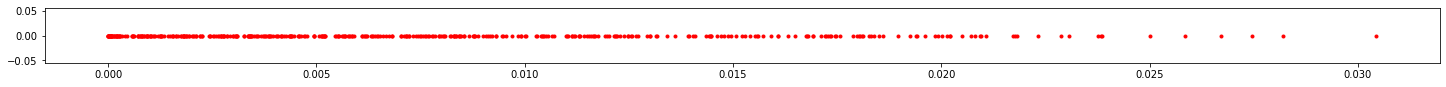

In [227]:
plt.figure(figsize=(25,1))
plt.scatter(p1, [0]*len(p1), c='r', marker='.')


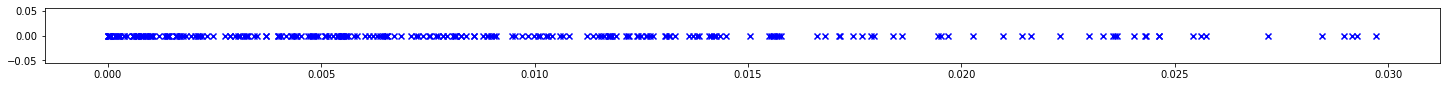

In [231]:
plt.figure(figsize=(25,1))
plt.scatter(p2, [0]*len(p2), c='b', marker='x')

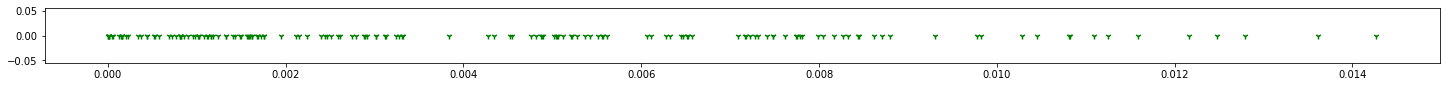

In [232]:
plt.figure(figsize=(25,1))
plt.scatter(p3, [0]*len(p3), c='g', marker='1')

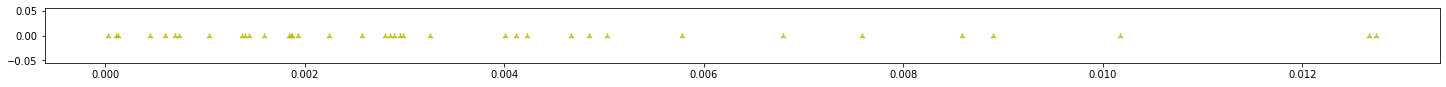

In [233]:
plt.figure(figsize=(25,1))
plt.scatter(p4, [0]*len(p4), c='y', marker='2')

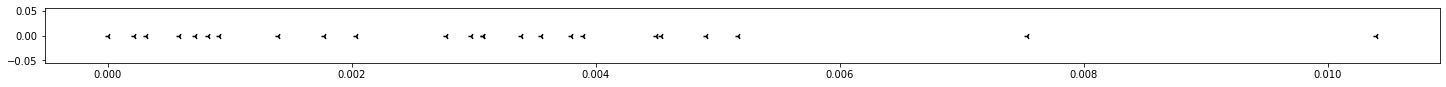

In [234]:
plt.figure(figsize=(25,1))
plt.scatter(p5, [0]*len(p5), c='k', marker='3')

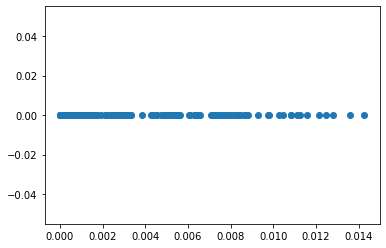

In [229]:
plt.scatter(p3, [0]*len(p3))

In [0]:
sorted(p1)

In [0]:
sorted(p2)

In [0]:
sorted(p3)

In [0]:
sorted(p5)

In [0]:
plt.scatter(p4, [0]*len(p4))

In [0]:
plt.scatter(p5, [0]*len(p5))

In [0]:
p5

In [0]:
p1

# Classify class 1 and 2

In [334]:
X_train.shape

(872, 2)

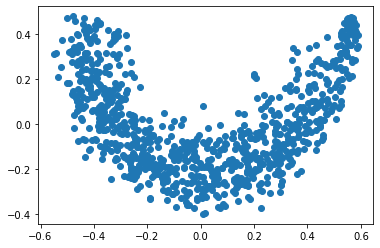

In [335]:
plt.scatter(X_train[0], X_train[1])

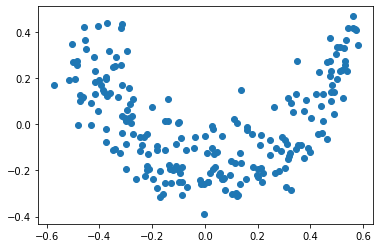

In [336]:
plt.scatter(X_test[0], X_test[1])